In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Local import
from dataprocess import DataLoader, Blurr

In [2]:
import os
from PIL import Image
from scipy import signal

## Pre-process images

### Load image

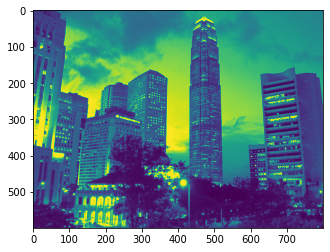

In [3]:
file_name = 'Images'
im_name   = 'image01.png'
x_init = DataLoader(file_name,im_name)
plt.imshow(x_init)

### Define gaussian kernel

2D Gaussian-like array:


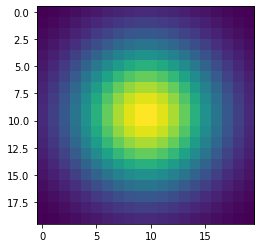

In [4]:
M=10
Nx, Ny = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d = np.sqrt(Nx*Nx+Ny*Ny)
sigma, mu = 0.5, 0.0
K = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
K = K/K.sum()
print("2D Gaussian-like array:")
plt.imshow(K)

In [5]:
K.ndim

2

In [6]:
K_padd = np.pad(K, ((300-M,300-M),(400-M,400-M)), 'constant')
K_padd.shape

(600, 800)

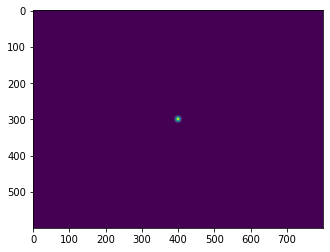

In [7]:
plt.imshow(K_padd)

### Blurr and add noise

In [8]:
x_b = Blurr(x_init,K_padd)

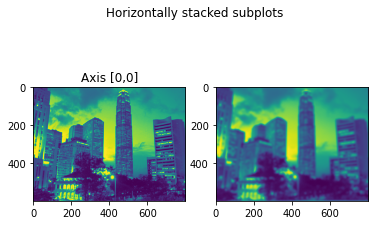

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.imshow(x_init)
ax1.set_title('Axis [0,0]')
ax2.imshow(x_b)